## Assignment 1

**Submission deadlines:**
- get at least **2** points by Tuesday, 27.02.2024
- remaining points: last lab session before or on Tuesday, 05.03.2023

**Points:** Aim to get 8 out of 14 possible points

## Submission instructions
The class is held on-site in lab rooms. Please prepare you notebook on your computer or anywhere in the cloud (try using DeepNote or Google Colab).

Make sure you know all the questions and asnwers, and that the notebook contains results; before presentation do `Runtime -> Restart and run all`
![Picture title](image-20220302-183151.png)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.


# Task description

## TLDR
Implement and train a neural network using pure `torch`.


## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

A two-layer neural network implementes a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^O$ where $D$ is the input dimensionality and $O$ is the output dinemsionality. The output goes through an intermediate representation (the hidden layer) with dimensionality $H$.

The computations are as follows:
$$
\begin{aligned}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma_1(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma_2(A_2)  & \qquad\text{Output of the network}
\end{aligned}
$$

Where $W$ are weight matrices, $b$ are bias vectors, $\sigma$ are non-linear activation functions (e.g. the logistic sigmoid applied element-wise, or softmax).

For the 2D xor problem the network will:
- have 2 inputs, 2 hidden neurons, one output
- use the logistic sigmoid everywhere (that way we, when hand-designig the weights, we can assume that neurons' outputs are binary).

Therrefore the shapes of the data flowing through the network will be:
- input: $x\in\mathbb{}R^{2}$
- hidden layer parameters: $W_1\in\mathbb{}R^{2\times 2}$ and $b_1\in\mathbb{}R^{2}$
- representations in the hidden layer: $A_1\in\mathbb{}R^{2}$ and $O_1\in\mathbb{}R^{2}$
- output layer parameters: $W_2\in\mathbb{}R^{1\times 2}$ and $b_2\in\mathbb{}R^{1}$
- representations in the output layer: $A_2\in\mathbb{}R^{1}$ and $O_2\in\mathbb{}R^{1}$

The network can be seen as a logistic regression model, prefixed by a nonlinear transformation of the data.

The first tasks consists of:
- implementing the network
- selecting parametwrs ($W_1, b_1, W_2, b_2$) such that $f(x)\approx XOR(x_1, x_2)$ where the approximation is die to the sigmoids - the output may be close to 0 or 1, but doesn't need to saturate at 0 or 1.

NB: the convention on weight matrix shapes follows linear [layers in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).


## Problem 2 [2p]
1. Add a backward pass.
2. Use a sensible random initialization for weights and biases.
3. Numerically check the correctness of your gradient computation.

There is nice article about taking derivative over vectors and vector chain rule: https://explained.ai/matrix-calculus/ if someone don't have experience with such calculus.


## Problem 3 [2p]
1. Implement gradient descent
2. Train your network to solve 3D XOR
3. Try several hidden layer sizes, for each size record the fracton of successful trainings. Then answer:
    - What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
    - What is the minimal hidden size required to reliably solve 3D XOR
    - Which networks are easier to train - small or large ones? Why?


## Problem 4 [1p]
Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Find a network architecture which reliably learns the 3D XOR problem.


## Problem 5 [1p]
Add a second hidden layer to your network, implement the forward and backward pass, then demonstrate training.


## Problem 6 [2p]
Implement a way to have a _variable number_ of hidden layers. Check how deep sigmoid or ReLU networks you  can train. For simplicity you can assume that all hidden layers have the same number of neurons, and use the same activation function.


## Problem 7 [2p]
Consider the following function $\boldsymbol f: \mathbb R^n \to \mathbb R^k$:
$$ \hat{\boldsymbol y} := \boldsymbol f(\boldsymbol x\,;\,\,W, \boldsymbol b) = \mathrm{softmax}(\boldsymbol z) \qquad (\boldsymbol x \in \mathbb R^{n}, \, W \in\mathbb R^{k\times n}, \, \boldsymbol b \in \mathbb R^k), $$
where $$ \boldsymbol z = W  \boldsymbol x + \boldsymbol b $$
and $W, \boldsymbol b$ are the parameters.

Analytically derive the form of the following gradients:

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol z} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{W_{ij}} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol b} = \ldots $$

# Solutions and starter code

In [ ]:
import matplotlib.pyplot as plt
import torch
from torch import matmul

XOR dataset creation

(-0.05, 1.05, -0.05, 1.05)

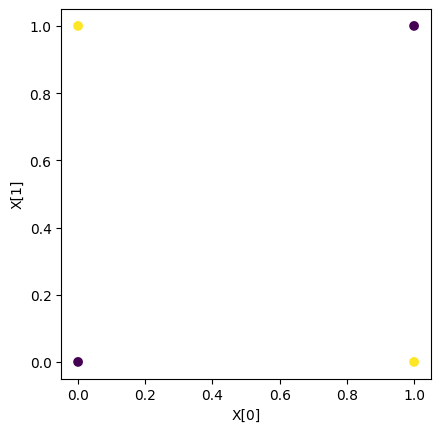

In [ ]:
# Let's define a XOR dataset

# X will be matrix of N 2-dimensional inputs
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=torch.float64)
# Y is a matrix of N numners - answers
Y = torch.tensor([[0], [1], [1], [0],], dtype=torch.float64)

plt.scatter(
    X[:, 0], X[:, 1], c=Y[:, 0],
)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.axis("square")

## Problem 1

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D$ matrix.

In [ ]:
import numpy as np
def sigmoid(x,deriv=False):
  if not deriv:
    return 1 / (1 + np.exp(-x))
  return 1 / (1 + np.exp(-x)) * (1 - 1 / (1 + np.exp(-x)))
def relu(x,deriv=False):
  if not deriv:
    return np.maximum(0, x)
  return np.where(x > 0, 1, 0)

class SmallNet:
    def __init__(self, in_features, num_hidden, dtype=np.float64):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)
        self.W2 = np.zeros((1, num_hidden), dtype=dtype)
        self.b2 = np.zeros((1,), dtype=dtype)
        self.init_params(in_features, num_hidden)


    def init_params(self, in_features, num_hidden):
        # TODO for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        self.W1 = np.random.normal(scale = 0.5, size = (num_hidden, in_features))
        self.b1 = np.random.normal(scale = 0.5, size = (num_hidden,))
        self.W2 = np.random.normal(scale = 0.5, size = (1, num_hidden))
        self.b2 = np.random.normal(scale = 0.5, size = (1,))

    def forward(self, X, Y=None, do_backward=False, actfunc = sigmoid):
        # TODO Problem 1: Fill in details of forward propagation
        # Input to neurons in 1st layer
        A1 = X @ self.W1.T + self.b1
       # print("a1",A1)
        # Outputs after the sigmoid non-linearity
        O1 = actfunc(A1)
        #print("o1",O1)
        # Inputs to neuron in the second layer
        A2 = O1 @ self.W2.T + self.b2
        #print("a2",A2)
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)
       # print("o2",O2)
        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -(Y * np.log(O2) + (1 - Y) * np.log(1.0 - O2))
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:

            # TODO in Problem 2:
            # fill in the gradient computation
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss

            A2_grad = (O2 - Y) # 1 1 elementy wykladu
            # print("A2",A2_grad)
            self.b2_grad = A2_grad.sum(0)/ A2_grad.shape[0]#  1 3 2
            #print("B2",self.b2_grad )#
            self.W2_grad = A2_grad.T @ O1 / A2_grad.shape[0]# 1 3
            O1_grad = A2_grad @ self.W2  # 2 1

            A1_grad = O1_grad * actfunc(A1,True) # 2 2

            self.b1_grad = A1_grad.sum(0) / A2_grad.shape[0]# 2 3 2
            self.W1_grad = A1_grad.T @ X / A1_grad.shape[0]# 2 3

        return O2, loss

In [ ]:
# TODO Problem 1:
# Set by hand the weight values to solve the XOR problem
import numpy as np
net = SmallNet(2, 2, dtype=np.float64)



# Hint: since we use the logistic sigmoid activation, the weights may need to
# be fairly large

predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p}")

XORnet(tensor([0., 0.], dtype=torch.float64)) = tensor([0.5252], dtype=torch.float64)
XORnet(tensor([0., 1.], dtype=torch.float64)) = tensor([0.5220], dtype=torch.float64)
XORnet(tensor([1., 0.], dtype=torch.float64)) = tensor([0.5277], dtype=torch.float64)
XORnet(tensor([1., 1.], dtype=torch.float64)) = tensor([0.5248], dtype=torch.float64)


## Problem 2

In [ ]:
def check_grad(net, param_name, X, Y, eps=1e-5):
    """A gradient checking routine"""

    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)

    grad = np.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)

    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + "_grad")
    assert param.shape == orig_grad.shape

    for i in range(param_flat_accessor.shape[0]):
        orig_val = param_flat_accessor[i]
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps)
    assert np.allclose(grad, orig_grad)
    print("grad",grad)
    print("orig",orig_grad)
    print()
    return grad, orig_grad

In [ ]:
# Hint: use float64 for checking the correctness of the gradient
net = SmallNet(2, 2, dtype=np.float64)


for param_name in ["W1", "b1", "W2", "b2"]:
    check_grad(net, param_name, X, Y)

grad [[0.06171831 0.06060681]
 [0.03922224 0.03998693]]
orig tensor([[0.0617, 0.0606],
        [0.0392, 0.0400]], dtype=torch.float64)

grad [0.12238442 0.07900317]
orig tensor([0.1224, 0.0790], dtype=torch.float64)

grad [[-0.17997085 -0.14089559]]
orig tensor([[-0.1800, -0.1409]], dtype=torch.float64)

grad [-0.37095668]
orig tensor([-0.3710], dtype=torch.float64)



## Problem 3

In [ ]:
def gradient_descent(net, alpha, X, Y, actfunc=sigmoid):
    for i in range(100000):
        net_result, loss = net.forward(X, Y, do_backward=True, actfunc=actfunc)
        if (i % 5000) == 0:
            print(f"{i} i \tloss={loss}")
        for param_name in ["W1", "b1", "W2", "b2"]:
            param = getattr(net, param_name)
            grad_param = getattr(net, param_name + "_grad")
            # Convert tensor to numpy array
            param = np.array(param)
            grad_param = np.array(grad_param)
            param[:] = param - alpha * grad_param
            # Set updated numpy array back to network parameter
            setattr(net, param_name, param)

    return net_result, loss, param

In [ ]:
net = SmallNet(2, 10, dtype=np.float64)
_ = gradient_descent(net, 0.1, X, Y)

0 i 	loss=0.7010466192201348
5000 i 	loss=0.036296782716483136
10000 i 	loss=0.010474812393589154
15000 i 	loss=0.005882141551051386
20000 i 	loss=0.004034421331434398
25000 i 	loss=0.0030489445432268078
30000 i 	loss=0.002440146786741662
35000 i 	loss=0.00202829667607213
40000 i 	loss=0.0017319052878136555


KeyboardInterrupt: 

In [ ]:
# TODO:
# Generate data for a 3D XOR task
# Then estimate the success rate of training the network with diferent
# hidden sizes.
import itertools
values = [1, 0]
X3 = np.zeros(shape = (8, 3), dtype = np.float64)
Y3 = np.zeros(shape = (8, 1), dtype = np.float64)
for index, input in enumerate(itertools.product(values, repeat = 3)):
    X3[index, :] = input
    Y3[index, 0] = input[0] ^ input[1] ^ input[2]
# print(X3)
# print(Y3)
for hidden_dim in [2, 3, 5, 10, 20]:
    # TODO: run a few trainings and record the fraction of successful ones
    print(f"size = {hidden_dim}")

    net = SmallNet(3, hidden_dim, dtype=np.float64)
    res, loss, _ = gradient_descent(net,alpha = 0.1,X = X3,Y = Y3,actfunc = sigmoid)
    print("\nLOSS:", loss)
    print("RESULT:")
    for input, output, y in zip(X3, res, Y3):
        print(f"XOR({input}) = {output}  Y: {y}")


size = 2
0 i 	loss=0.6970554263675982
5000 i 	loss=0.6931633686318306
10000 i 	loss=0.6928541264534673
15000 i 	loss=0.688364781181837
20000 i 	loss=0.4219879176021763
25000 i 	loss=0.3652783476591328
30000 i 	loss=0.35663031474094864
35000 i 	loss=0.35335851709086474
40000 i 	loss=0.35166363451414107
45000 i 	loss=0.3506335852266336
50000 i 	loss=0.34994374437170916
55000 i 	loss=0.34945053138169757
60000 i 	loss=0.34908091305172806
65000 i 	loss=0.34879391093113693
70000 i 	loss=0.348564793693128
75000 i 	loss=0.34837776965292444
80000 i 	loss=0.34822229158034285
85000 i 	loss=0.34809105151786524
90000 i 	loss=0.3479788287734802
95000 i 	loss=0.3478817961145047

LOSS: 0.3477971008768018
RESULT:
XOR([1. 1. 1.]) = [0.99883201]  Y: [1.]
XOR([1. 1. 0.]) = [0.50092911]  Y: [0.]
XOR([1. 0. 1.]) = [0.50083162]  Y: [0.]
XOR([1. 0. 0.]) = [0.99889373]  Y: [1.]
XOR([0. 1. 1.]) = [0.00115184]  Y: [0.]
XOR([0. 1. 0.]) = [0.49963282]  Y: [1.]
XOR([0. 0. 1.]) = [0.49955936]  Y: [1.]
XOR([0. 0. 0.]

## Problem 4


In [ ]:
for hidden_dim in [2, 3, 5, 10, 20,40,80]:
    print(f"size= {hidden_dim}")

    net = SmallNet(3, hidden_dim, dtype=np.float64)
    res, loss, params = gradient_descent(net,alpha = 0.1,X = X3,Y = Y3,actfunc = relu)
    print("\nLOSS:", loss)
    print("RESULT:")
    for input, output, y in zip(X3, res, Y3):
        print(f"XOR({input}) = {output}  Y: {y}")

    print("\n")

## Problem 5

In [ ]:
class TwoLayerNet:
    def __init__(self, in_features, num_first_hidden, num_second_hidden, dtype=np.float32):

        self.W1 = np.zeros((num_first_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_first_hidden,), dtype=dtype)
        self.W2 = np.zeros((num_second_hidden, num_first_hidden), dtype=dtype)
        self.b2 = np.zeros((num_second_hidden,), dtype=dtype)
        self.W3 = np.zeros((1, num_second_hidden), dtype=dtype)
        self.b3 = np.zeros((1,), dtype=dtype)
        self.init_params(in_features, num_first_hidden, num_second_hidden)

    def init_params(self, in_features, num_first_hidden, num_second_hidden):
        # TODO for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        self.W1 = np.random.normal(scale = 0.5, size = (num_first_hidden, in_features))
        self.b1 = np.random.normal(scale = 0.5, size = (num_first_hidden,))
        self.W2 = np.random.normal(scale = 0.5, size = (num_second_hidden, num_first_hidden))
        self.b2 = np.random.normal(scale = 0.5, size = (num_second_hidden,))
        self.W3 = np.random.normal(scale = 0.5, size = (1, num_second_hidden))
        self.b3 = np.random.normal(scale = 0.5, size = (1,))

    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation
        # Input to neurons in 1st layer
        A1 = X @ self.W1.T + self.b1

        O1 = sigmoid(A1)
        A2 = O1 @ self.W2.T + self.b2
        O2 = sigmoid(A2)
        A3 = O2 @ self.W3.T + self.b3
        O3 = sigmoid(A3)
        if Y is not None:
            loss = -(Y * np.log(O3) + (1 - Y) * np.log(1.0 - O3))
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            # TODO in Problem 2:
            # fill in the gradient computation
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss

            A3_grad = O3 - Y
            O2_grad = A3_grad @ self.W3
            A2_grad = O2_grad * sigmoid(A2,True)
            O1_grad = A2_grad @ self.W2
            A1_grad = O1_grad *  sigmoid(A1,True)

            self.b3_grad = A3_grad.sum(0) / A3_grad.shape[0]
            self.W3_grad = A3_grad.T @ O2 / A3_grad.shape[0]
            self.b2_grad = A2_grad.sum(0) / A2_grad.shape[0]
            self.W2_grad = A2_grad.T @ O1 / A2_grad.shape[0]
            self.b1_grad = A1_grad.sum(0) / A2_grad.shape[0]
            self.W1_grad = A1_grad.T @ X / A1_grad.shape[0]

        return O3, loss

In [ ]:
def gradient_descent_twolayered(net, alpha, X, Y):
    for i in range(100000):
        net_result, loss = net.forward(X, Y, do_backward=True)
        if (i % 5000) == 0 :
            print(f"{i} i \tloss={loss}")
        for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
            param = getattr(net, param_name)
            # Hint: use the construct `param[:]` to change the contents of the array!
            # Doing instead `param = new_val` simply changes to what the variable
            # param points to, without affecting the network!
            # alternatively, you could do setattr(net, param_name, new_value)
            param[:] = param - alpha * getattr(net, param_name + "_grad")
    return net_result, loss

In [ ]:

dims = [[3, 1], [3, 2],[3,3],[2,2]]
for first_hidden_dim, second_hidden_dim in dims:
    print(f"size = ({first_hidden_dim}, {second_hidden_dim})")
    net = TwoLayerNet(3, first_hidden_dim, second_hidden_dim, dtype=np.float64)
    res, loss = gradient_descent_twolayered(net,alpha = 0.1,X = X3,Y = Y3)
    print("\nLOSS:", loss)
    print("RESULT:")
    for input, output, y in zip(X3, res, Y3):
        print(f"XOR({input}) = {output}  Y: {y}")
    print("\n")

size = (3, 1)
0 i 	loss=0.7036967431861787
5000 i 	loss=0.6931415722693041
10000 i 	loss=0.6931381265961987
15000 i 	loss=0.6931331434545005
20000 i 	loss=0.6931252642786424
25000 i 	loss=0.6931114881533863
30000 i 	loss=0.693083794483949
35000 i 	loss=0.693013770049397
40000 i 	loss=0.6927331444224272
45000 i 	loss=0.6882092395615288
50000 i 	loss=0.5593454830234483
55000 i 	loss=0.014097608839629884
60000 i 	loss=0.00579398612076062
65000 i 	loss=0.0036423238924769077
70000 i 	loss=0.0026567412803282504


KeyboardInterrupt: 

## Problem 6

In [ ]:

class NLayerNet:
    def genhiddenlayer(self , dtype=np.float32):
          for i in range(2,self.num_of_hidden_lay):

            wi= np.zeros((self.num_neurons_hidden_neur, self.num_neurons_hidden_neur), dtype=dtype)
            bi= np.zeros((self.num_neurons_hidden_neur,), dtype=dtype)
            self.hidden[i]=wi,bi

          wend= np.zeros((1, self.num_neurons_hidden_neur), dtype=dtype)
          bend= np.zeros((1,), dtype=dtype)

          self.hidden[self.num_of_hidden_lay]=wend,bend


    def __init__(self, in_features, num_of_hidden_lay, num_neurons_hidden_neur, dtype=np.float32):

           self.verbote=False
           self.deklarowanietablic = num_of_hidden_lay + 2
           self.num_of_hidden_lay=num_of_hidden_lay+1

           self.num_neurons_hidden_neur=num_neurons_hidden_neur
           self.in_features=in_features

           self.hidden = np.empty((self.deklarowanietablic, 2), dtype=object)
           self.hidden_grad =np.empty((self.deklarowanietablic, 2), dtype=object)

           W1 = np.zeros((num_neurons_hidden_neur, in_features), dtype=dtype)
           b1 = np.zeros((num_neurons_hidden_neur,), dtype=dtype)
           self.hidden[1]=W1,b1

           self.genhiddenlayer()
           self.init_params()




    def init_params(self):
        self.hidden[1][0]=np.random.normal(scale = 0.5, size = (self.num_neurons_hidden_neur, self.in_features))
        self.hidden[1][1]= np.random.normal(scale = 0.5, size = (self.num_neurons_hidden_neur,))
        for i in range(2,self.num_of_hidden_lay):
          self.hidden[i][0]=np.random.normal(scale = 0.5, size = (self.num_neurons_hidden_neur, self.num_neurons_hidden_neur))
          self.hidden[i][1]= np.random.normal(scale = 0.5, size = (self.num_neurons_hidden_neur,))

        self.hidden[self.num_of_hidden_lay][0]= np.random.normal(scale = 0.5, size = (1, self.num_neurons_hidden_neur))
        self.hidden[self.num_of_hidden_lay][1]= np.random.normal(scale = 0.5, size = (1,))



    def forward(self, X, Y=None, do_backward=False):
        A = np.zeros(self.deklarowanietablic, dtype=object)
        O = np.zeros(self.deklarowanietablic, dtype=object)

        A[1] = X @ self.hidden[1][0].T + self.hidden[1][1]
        O[1]=sigmoid(A[1])


        if self.verbote:
            print( "A",A[0].shape[0],A[0].shape[1])
            print( "O",O[0].shape[0],O[0].shape[1])

        for i in range(2,self.deklarowanietablic):

          A[i] = O[i-1] @ self.hidden[i][0].T+ self.hidden[i][1]
          O[i]=sigmoid(A[i])


          if self.verbote:
            print( "A",A[i].shape[0],A[i].shape[1])
            print( "O",O[i].shape[0],O[i].shape[1])



        if self.verbote:
          print( "A",A[self.num_of_hidden_lay-1].shape[0],A[self.num_of_hidden_lay-1].shape[1])
          print( "O",O[self.num_of_hidden_lay-1].shape[0],O[self.num_of_hidden_lay-1].shape[1])


       # print(O[-1])
        if Y is not None:
            loss = -(Y * np.log(O[self.num_of_hidden_lay]) + (1 - Y) * np.log(1.0 - O[self.num_of_hidden_lay]))
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            A_grad = np.zeros(self.deklarowanietablic, dtype=object)
            O_grad = np.zeros(self.deklarowanietablic, dtype=object)

            A_grad[self.num_of_hidden_lay]=O[self.num_of_hidden_lay] - Y

            for i in range(self.num_of_hidden_lay,0,-1):
              # print(i)
              O_grad[i-1]=A_grad[i] @ self.hidden[i][0]
              A_grad[i-1] = O_grad[i-1] * sigmoid(A[i-1],True)

            for i in range(self.num_of_hidden_lay,1,-1):

              self.hidden_grad[i][1]=A_grad[i].sum(0)/A_grad[i].shape[0]
              self.hidden_grad[i][0]=A_grad[i].T @ O[i-1]/A_grad[i].shape[0]

            self.hidden_grad[1][1]=A_grad[1].sum(0)/A_grad[1].shape[0]
            self.hidden_grad[1][0]=A_grad[1].T @ X/ A_grad[1].shape[0]
            #ciekwi mnie cemu nie dzialalo mi z [:]
        #print(O[self.num_of_hidden_lay])
        return O[self.num_of_hidden_lay], loss



In [ ]:


def gradient_descent_Nlayer(net, alpha, X, Y):
    for i in range(100000):
        net_result, loss = net.forward(X, Y, do_backward=True)
        if (i % 5000) == 0:
            print(f"after {i} steps \tloss={loss}")
        param = getattr(net, "hidden")
        grad=getattr(net, "hidden" + "_grad")
        for i in range(1,len(param)):
          # print("param",param[i][0] )

          # print("param2",alpha *grad[i][0])
          # print("wyn",param[i][0] - alpha *grad[i][0])
          param[i][1] = param[i][1] - alpha *grad[i][1]
          param[i][0] = param[i][0] - alpha *grad[i][0]

          #print("paramwyn",param[:])
    return net_result, loss


In [ ]:
dims = [[4, 1], [4, 2],[4,3],[8,2]]
for numofneurons ,numoflayers in dims:
    print(f"size = ({numoflayers}, {numofneurons})")
    net = NLayerNet(3,numoflayers,numofneurons  , dtype=np.float64)
    res, loss = gradient_descent_Nlayer(net, alpha=0.1, X=X3, Y=Y3)
    print("\nLOSS:", loss)
    print("RESULT:")
    for input, output, y in zip(X3, res, Y3):
        print(f"XOR({input}) = {output}  Y: {y}")
    print("\n")


size = (1, 4)
after 0 steps 	loss=0.7363929638185444
after 5000 steps 	loss=0.6925985716964397
after 10000 steps 	loss=0.4835284359473316
after 15000 steps 	loss=0.01898565211708713
after 20000 steps 	loss=0.007247622971145021
after 25000 steps 	loss=0.004321362447257685
after 30000 steps 	loss=0.003040389803877297
after 35000 steps 	loss=0.002331151311701569
after 40000 steps 	loss=0.0018837287236576255
after 45000 steps 	loss=0.0015769541341270823
after 50000 steps 	loss=0.001354089834364707
after 55000 steps 	loss=0.001185152052274915
after 60000 steps 	loss=0.0010528522474600181
after 65000 steps 	loss=0.0009465420851785327
after 70000 steps 	loss=0.0008593147827158909
after 75000 steps 	loss=0.0007864996575597492
after 80000 steps 	loss=0.0007248278241408549
after 85000 steps 	loss=0.0006719446684896456
after 90000 steps 	loss=0.0006261121064423396
after 95000 steps 	loss=0.0005860198250044655

LOSS: 0.0005506683723498138
RESULT:
XOR([1. 1. 1.]) = [0.99967147]  Y: [1.]
XOR([1. 1. 

## Problem 7